<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/Errors_Terra_0_5h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22
m_mart= 6.4171e23
m_jupiter= 18.9819e26
m_venus= 48.685e23

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic a partir de les dues constants anteriors

def normalitza(cos): # Primer passem a m i m/s, després normalitzem
  pos= cos[:3] * 1e3 / r0
  vel= cos[3:] * 1e3 * (t0 / r0)
  return pos, vel

def acceleracions(pos, masses): # pos és matriu N files i 3 columnes
    N= len(masses) # Nombre de planetes
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma que pos però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j:  # Si i ≠ j, perquè un cos no s'atrau a ell mateix
                diff= pos[j] - pos[i]
                d= np.linalg.norm(diff) # Calcula la norma del vector diferència de posicions
                acc[i]= acc[i] + masses[j] * diff / d**3
    return acc
def euler(pos, vel, masses, h):
    acc_euler= acceleracions(pos, masses)
    vel_nou= vel + h * acc_euler
    pos_nou= pos + h * vel
    return pos_nou, vel_nou

def rk4(pos, vel, masses, h):
    K1= vel
    L1= acceleracions(pos, masses)
    K2= vel + 0.5*h*L1
    L2= acceleracions(pos + 0.5*h*K1, masses)
    K3= vel + 0.5*h*L2
    L3= acceleracions(pos + 0.5*h*K2, masses)
    K4= vel + h*L3
    L4= acceleracions(pos + h*K3, masses)
    pos_nou= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nou= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nou, vel_nou


In [15]:
from google.colab import files
import pandas as pd
# Quan executem aquest codi des de Google Collab, trobarem l'opció de "Escollir arxius" a la terminal, on hem de seleccionar el fitxer "planet_pos_30min", que ha d'estar prèviament descarregat
def error_abs(NASA, numerica):
  """
  NASA: np.array, la solució extreta de la pàgina web
  numerica: np.array, calcul numèric
  """
  error = (NASA - numerica)
  return error

uploaded = files.upload()
file_path = '/content/planet_pos_30min.csv'
NASA = np.array([10**3,10**3,10**3])*np.array(pd.read_csv(file_path))
temps=len(NASA)-1

Saving planet_pos_30min.csv to planet_pos_30min (1).csv


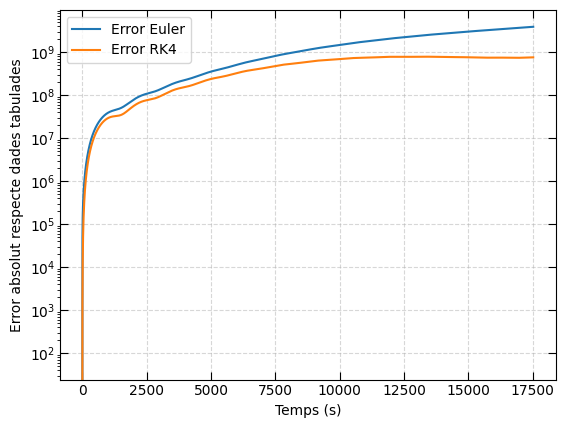

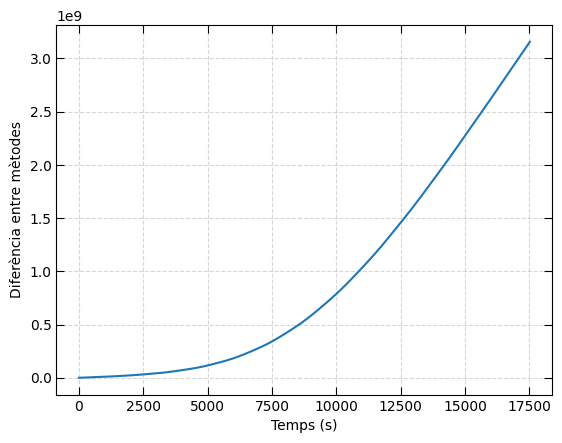

In [27]:
from ast import mod
# Sol i Terra
terra= np.array([-4.133776193197704E+05, -1.528302631740080E+08, 3.242787546419352E+04, 2.932642969192311E+01, -7.378251225841874E-02, -1.172300943162528E-03])
sol= np.array([-6.709778526834890E+05, -8.035450223536204E+05, 2.366174814134883E+04, 1.263745636317092E-02, -3.212119035319765E-03, -2.265926685887389E-04])

masses= np.array([m_sol/m0, m_terra/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
posicions= np.array([pos_sol, pos_terra])
velocitats= np.array([vel_sol, vel_terra])

dies= 365
h= 1/48
passos= int(dies/h)
euler_st= np.zeros((passos+1, 2, 3))
rk4_st  = np.zeros((passos+1, 2, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_st[0]= pos_euler
rk4_st[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_st[k+1]= pos_euler
    rk4_st[k+1]  = pos_rk4

#Error EULER
error_e_st = error_abs(NASA, np.array([r0,r0,r0])*euler_st[:,1,:])

mod_error_e_st = []
for i in error_e_st:
  mod_error_e_st.append(np.linalg.norm(i))

plt.plot(np.linspace(0,temps,temps+1),mod_error_e_st, label="Error Euler")
plt.yscale("log")

#Error RK4
error_rk_st = error_abs(NASA, np.array([r0,r0,r0])*rk4_st[:,1,:])
mod_error_rk_st =[]
for i in error_rk_st:
  mod_error_rk_st.append(np.linalg.norm(i))
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_st, label="Error RK4")
plt.yscale("log")
plt.xlabel("Temps (s)")
plt.ylabel("Error absolut respecte dades tabulades")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Diferència mètodes
dif = np.array(mod_error_e_st)-np.array(mod_error_rk_st)
plt.plot(np.linspace(0,temps,temps+1),dif)
plt.xlabel("Temps (s)")
plt.ylabel("Diferència entre mètodes")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

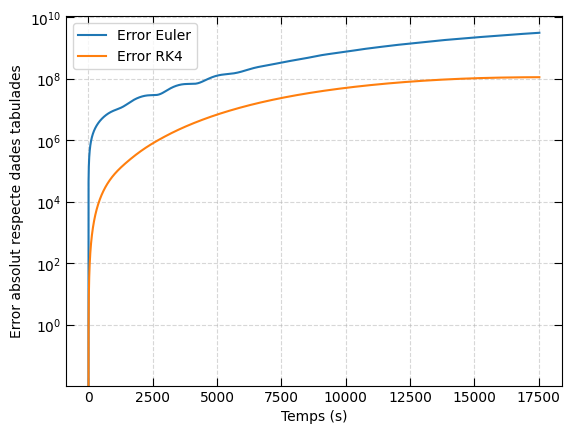

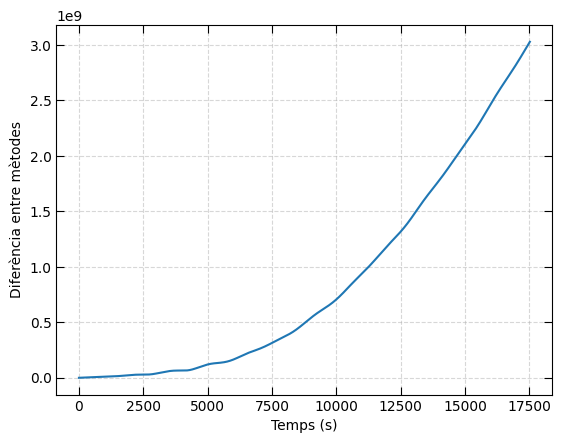

In [28]:
#Sol, Terra i Lluna
lluna= np.array([-1.223926947846045E+05, -1.526112945833626E+08, 5.512426763091981E+04, 2.865929048411513E+01, 7.673984975198109E-01, 6.367954761104172E-02])
terra= np.array([-4.133776193197704E+05, -1.528302631740080E+08, 3.242787546419352E+04, 2.932642969192311E+01, -7.378251225841874E-02, -1.172300943162528E-03])
sol= np.array([-6.709778526834890E+05, -8.035450223536204E+05, 2.366174814134883E+04, 1.263745636317092E-02, -3.212119035319765E-03, -2.265926685887389E-04])


masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
posicions= np.array([pos_sol, pos_terra, pos_lluna])
velocitats= np.array([vel_sol, vel_terra, vel_lluna])

dies= 365
h= 1/48
passos= int(dies/h)
euler_stl= np.zeros((passos+1, 3, 3))
rk4_stl = np.zeros((passos+1, 3, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_stl[0]= pos_euler
rk4_stl[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_stl[k+1]= pos_euler
    rk4_stl[k+1]  = pos_rk4

# Error euler
error_e_stl = error_abs(NASA, np.array([r0,r0,r0])*euler_stl[:,1,:])

mod_error_e_stl = []
for i in error_e_stl:
  mod_error_e_stl.append(np.linalg.norm(i))

plt.plot(np.linspace(0,temps,temps+1),mod_error_e_stl, label="Error Euler")
plt.yscale("log")

# Error RK4
error_rk_stl = error_abs(NASA, np.array([r0,r0,r0])*rk4_stl[:,1,:])
mod_error_rk_stl =[]
for i in error_rk_stl:
  mod_error_rk_stl.append(np.linalg.norm(i))
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_stl, label="Error RK4")
plt.yscale("log")
plt.xlabel("Temps (s)")
plt.ylabel("Error absolut respecte dades tabulades")
plt.legend()
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Diferència
dif = np.array(mod_error_e_stl)-np.array(mod_error_rk_stl)
plt.plot(np.linspace(0,temps,temps+1),dif)
plt.xlabel("Temps (s)")
plt.ylabel("Diferència entre mètodes")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


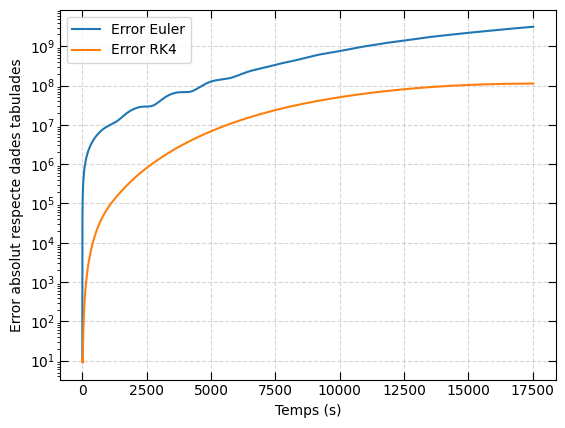

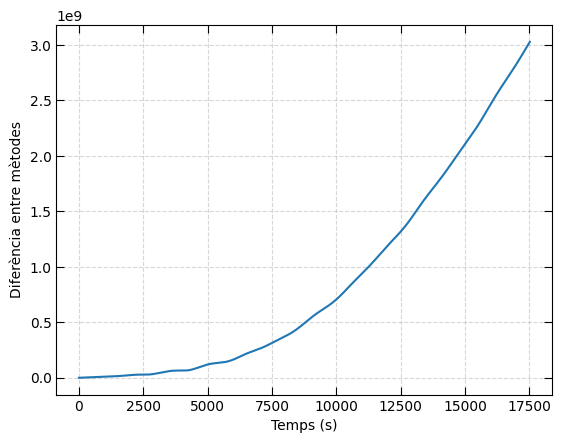

In [29]:
#Sol, Terra, Lluna i Mart

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart])

dies= 365
h= 1/48
passos= int(dies/h)
euler_stlm= np.zeros((passos+1, 4, 3))
rk4_stlm  = np.zeros((passos+1, 4, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_stlm[0]= pos_euler
rk4_stlm[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_stlm[k+1]= pos_euler
    rk4_stlm[k+1]  = pos_rk4

# Error euler
error_e_stlm = error_abs(NASA, np.array([r0,r0,r0])*euler_stlm[:,1,:])

mod_error_e_stlm = []
for i in error_e_stlm:
  mod_error_e_stlm.append(np.linalg.norm(i))

plt.plot(np.linspace(0,temps,temps+1),mod_error_e_stlm, label="Error Euler")
plt.yscale("log")

# Error RK4
error_rk_stlm = error_abs(NASA, np.array([r0,r0,r0])*rk4_stlm[:,1,:])
mod_error_rk_stlm =[]
for i in error_rk_stlm:
  mod_error_rk_stlm.append(np.linalg.norm(i))
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_stlm, label="Error RK4")
plt.yscale("log")
plt.xlabel("Temps (s)")
plt.ylabel("Error absolut respecte dades tabulades")
plt.legend()
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Diferència
dif = np.array(mod_error_e_stlm)-np.array(mod_error_rk_stlm)
plt.plot(np.linspace(0,temps,temps+1),dif)
plt.xlabel("Temps (s)")
plt.ylabel("Diferència entre mètodes")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



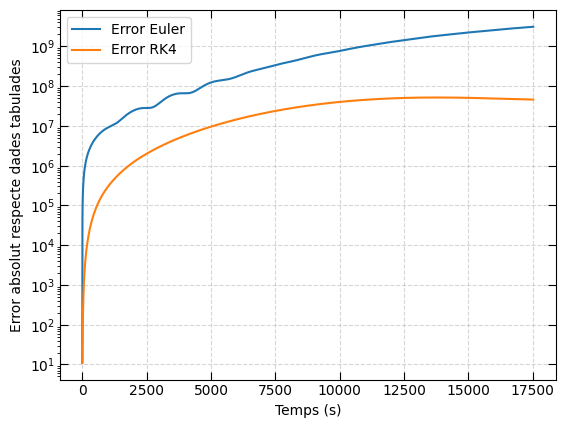

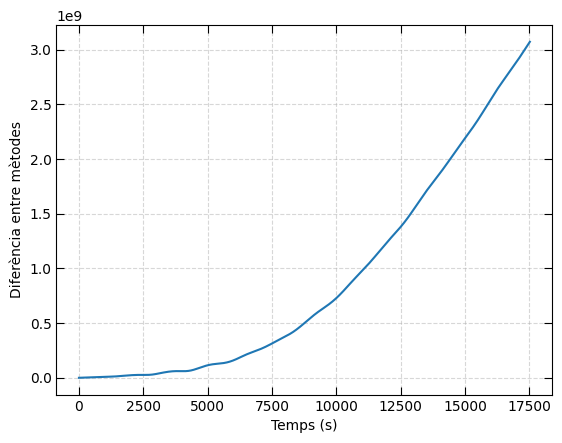

In [30]:
#Sol, venus,terra, lluna, mart, jupiter

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])
jupiter= np.array([-3.766214907360811E+07, 7.674900530284423E+08, -2.340181864259541E+06, -1.320277350206942E+01, -1.821231426227618E-02, 2.954873217258936E-01])
venus= np.array([9.000848903739944E+07, -6.083188193144653E+07, -6.033255262740046E+06, 1.912973897447851E+01, 2.905777575965793E+01, -7.040412673920500E-01])

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0, m_jupiter/m0, m_venus/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
pos_jupiter, vel_jupiter= normalitza(jupiter)
pos_venus, vel_venus= normalitza(venus)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart, pos_jupiter, pos_venus])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart, vel_jupiter, vel_venus])

dies= 365
h= 1/48
passos= int(dies/h)
euler_svtlmj= np.zeros((passos+1, 6, 3))
rk4_svtlmj  = np.zeros((passos+1, 6, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_svtlmj[0] = pos_euler
rk4_svtlmj[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_svtlmj[k+1]= pos_euler
    rk4_svtlmj[k+1]  = pos_rk4

# Error euler
error_e_svtlmj = error_abs(NASA, np.array([r0,r0,r0])*euler_svtlmj[:,1,:])

mod_error_e_svtlmj = []
for i in error_e_svtlmj:
  mod_error_e_svtlmj.append(np.linalg.norm(i))

plt.plot(np.linspace(0,temps,temps+1),mod_error_e_svtlmj, label="Error Euler")
plt.yscale("log")

# Error RK4
error_rk_svtlmj = error_abs(NASA, np.array([r0,r0,r0])*rk4_svtlmj[:,1,:])
mod_error_rk_svtlmj =[]
for i in error_rk_svtlmj:
  mod_error_rk_svtlmj.append(np.linalg.norm(i))
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_svtlmj, label="Error RK4")
plt.yscale("log")
plt.xlabel("Temps (s)")
plt.ylabel("Error absolut respecte dades tabulades")
plt.legend()
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Diferència
dif = np.array(mod_error_e_svtlmj)-np.array(mod_error_rk_svtlmj)
plt.plot(np.linspace(0,temps,temps+1),dif)
plt.xlabel("Temps (s)")
plt.ylabel("Diferència entre mètodes")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



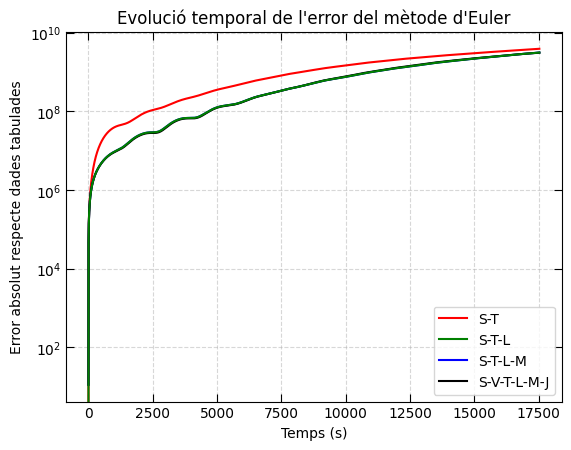

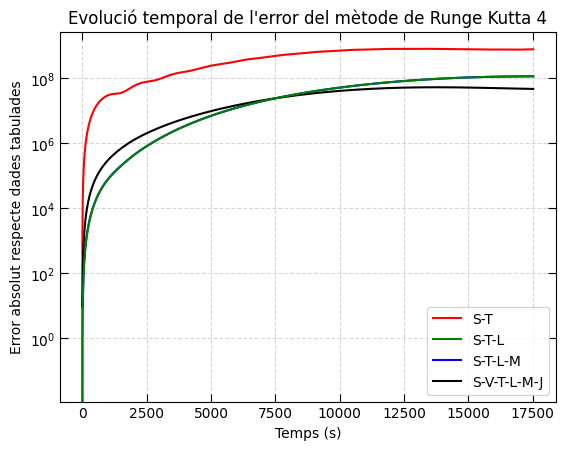

In [31]:
# Errors euler
plt.plot(np.linspace(0,temps,temps+1),mod_error_e_st, label="S-T", color="r")
plt.plot(np.linspace(0,temps,temps+1),mod_error_e_stl, label="S-T-L", color="g", zorder=5)
plt.plot(np.linspace(0,temps,temps+1),mod_error_e_stlm, label="S-T-L-M", color ="b")
plt.plot(np.linspace(0,temps,temps+1),mod_error_e_svtlmj, label ="S-V-T-L-M-J", color="black")
plt.yscale("log")
plt.xlabel("Temps (s)")
plt.ylabel("Error absolut respecte dades tabulades")
plt.title("Evolució temporal de l'error del mètode d'Euler")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.show()

# Errors rk4
3140816774.561751
3141571791.6680536
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_st, label="S-T", color="r")
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_stl, label="S-T-L", color="g", zorder=5)
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_stlm, label="S-T-L-M", color ="b")
plt.plot(np.linspace(0,temps,temps+1),mod_error_rk_svtlmj, label ="S-V-T-L-M-J", color="black")
plt.yscale("log")
plt.xlabel("Temps (s)")
plt.ylabel("Error absolut respecte dades tabulades")
plt.title("Evolució temporal de l'error del mètode de Runge Kutta 4")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.legend()
plt.show()